<a href="https://colab.research.google.com/github/hudaor/leaf-disease-1/blob/main/Copie_resnet_100_epochs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install pyyaml h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#Resnet50
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential

In [ ]:
#Parametres  
import keras
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
import sys
from tensorflow.keras import optimizers
from PIL import Image

#Using InceptionV3 Pre-trained Model
conv_base = ResNet50(weights = 'imagenet',
              include_top = False,
              input_shape=(224, 224, 3))

conv_base.summary()

import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator

base_dir = '/content/drive/MyDrive/2022dataset 05 2 22'
train_dir = os.path.join(base_dir, 'train')
#validation_dir = os.path.join(base_dir, 'validation')
#test_dir = os.path.join(base_dir, 'test')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

conv_base.trainable = False

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary')

# Compile the model
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=2e-5),
metrics=['acc'])

# Train the model
histore1 = model.fit_generator(
    train_generator,
    steps_per_epoch=50,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=len(validation_generator))

# Save the model
model.save('/content/drive/MyDrive/2022dataset 05 2 22/res1.h5')

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:73: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/5
50/50 [==============================] - 3278s 67s/step - loss: 0.8237 - acc: 0.5310 - val_loss: 0.6758 - val_acc: 0.5918
Epoch 2/5
50/50 [==============================] - 2043s 42s/step - loss: 0.7790 - acc: 0.5190 - val_loss: 0.6659 - val_acc: 0.5873
Epoch 3/5
50/50 [==============================] - 2064s 42s/step - loss: 0.8146 - acc: 0.5110 - val_loss: 0.6633 - val_acc: 0.5678
Epoch 4/5
50/50 [==============================] - 1997s 41s/step - loss: 0.7991 - acc: 0.5160 - val_loss: 0.7506 - val_acc: 0.4919
Epoch 5/5
50/50 [==============================] - 1987s 40s/step - loss: 0.7721 - acc: 0.5340 - val_loss: 0.7505 - val_acc: 0.4921


In [ ]:
#model3.save('/content/drive/MyDrive/18 04 22/inception3.h5') 
np.save('/content/drive/MyDrive/2022dataset 05 2 22/histore1', histore1) 

INFO:tensorflow:Assets written to: ram://af3915bd-50ed-4711-9169-c9808c237010/assets


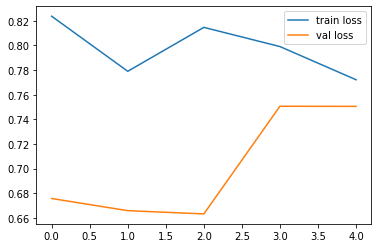

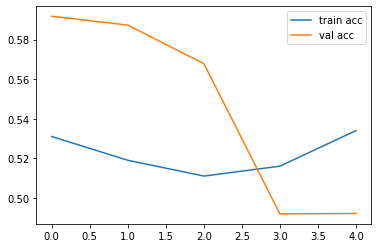

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

#read_r16 = np.load('/content/drive/MyDrive/2022dataset 05 2 22/historyy.npy',allow_pickle='TRUE').item()
#r_total_loss = read_r1.history['loss'] + read_r.history['loss']
#r_total_val_loss = read_r1.history['val_loss'] + read_r.history['val_loss']

#r_total_accuracy = read_r1.history['accuracy'] + read_r.history['accuracy']
#r_total_val_accuracy = read_r1.history['val_accuracy'] + read_r.history['val_accuracy']

#print(read_r1.history['loss'])



# plot the loss
plt.plot( histore1.history['loss'],  label='train loss')
plt.plot( histore1.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_lossCNN')

# plot the accuracy
plt.plot( histore1.history['acc'], label='train acc')
plt.plot( histore1.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_accCNN')

In [ ]:
!pip install pyyaml h5py
from google.colab import drive
drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Mounted at /content/drive


In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras import optimizers
from PIL import Image
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
!pip install pyyaml h5py
import os
base_dir = '/content/drive/MyDrive/2022dataset 05 2 22'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary')
modelr1 =load_model('/content/drive/MyDrive/2022dataset 05 2 22/res1.h5')


read_re1 = np.load('/content/drive/MyDrive/2022dataset 05 2 22/histore1.npy',allow_pickle='TRUE').item()


# Compile the model
modelr1.compile(loss='binary_crossentropy',
optimizer=optimizers.SGD(lr=2e-5),
metrics=['acc'])

# Train the model
histore2 = modelr1.fit_generator(
    train_generator,
    steps_per_epoch=50,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=len(validation_generator))

# Save the model
modelr1.save('/content/drive/MyDrive/2022dataset 05 2 22/res2.h5')
np.save('/content/drive/MyDrive/2022dataset 05 2 22/histore2', histore2) 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Found 34128 images belonging to 2 classes.
Found 8726 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/5
50/50 [==============================] - 2696s 55s/step - loss: 0.6536 - acc: 0.6160 - val_loss: 0.6500 - val_acc: 0.6129
Epoch 2/5
50/50 [==============================] - 788s 16s/step - loss: 0.6501 - acc: 0.6540 - val_loss: 0.6535 - val_acc: 0.6434
Epoch 3/5
50/50 [==============================] - 784s 16s/step - loss: 0.6609 - acc: 0.6170 - val_loss: 0.6739 - val_acc: 0.5583
Epoch 4/5
50/50 [==============================] - 771s 16s/step - loss: 0.6575 - acc: 0.6170 - val_loss: 0.6542 - val_acc: 0.6429
Epoch 5/5
50/50 [==============================] - 755s 15s/step - loss: 0.6571 - acc: 0.6010 - val_loss: 0.6566 - val_acc: 0.6403
INFO:tensorflow:Assets written to: ram://6c597bd4-6341-4515-b9eb-fccb503ac9b1/assets


In [ ]:

np.save('/content/drive/MyDrive/2022dataset 05 2 22/histore2', histore2) 


INFO:tensorflow:Assets written to: ram://308d2853-0cde-47b3-aee0-3efa37cf8ff7/assets


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


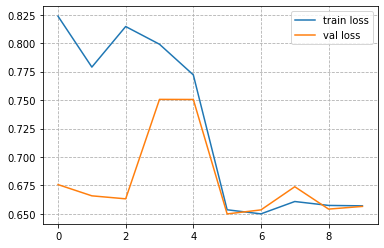

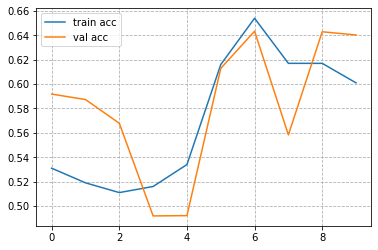

In [ ]:
import matplotlib.pyplot as plt
!pip install pyyaml h5py
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.inception_v3 import InceptionV3
#from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
read_r16 = np.load('/content/drive/MyDrive/2022dataset 05 2 22/histore1.npy',allow_pickle='TRUE').item()
#read_r17 = np.load('/content/drive/MyDrive/2022dataset 05 2 22/historyv3.npy',allow_pickle='TRUE').item()
read_r17 = np.load('/content/drive/MyDrive/2022dataset 05 2 22/histore2.npy',allow_pickle='TRUE').item()
#read_r19 = np.load('/content/drive/MyDrive/2022dataset 05 2 22/historyv9.npy',allow_pickle='TRUE').item()


#r_total_loss = read_r16.history['loss']+read_r17.history['loss'] + read_r18.history['loss']+  read_r19.history['loss']+read_r20.history['loss']
#r_total_val_loss = read_r16.history['val_loss']+read_r17.history['val_loss'] + read_r18.history['val_loss']+ read_r19.history['val_loss']+read_r20.history['val_loss']
#r_total_accuracy = read_r16.history['acc']+read_r17.history['acc'] + read_r18.history['acc']+ read_r19.history['acc']+read_r20.history['acc']
#r_total_val_accuracy =read_r16.history['val_acc']+ read_r17.history['val_acc'] + read_r18.history['val_acc']+ read_r19.history['val_acc']+read_r20.history['acc']

r_total_loss = read_r16.history['loss'] + read_r17.history['loss']
r_total_val_loss = read_r16.history['val_loss'] + read_r17.history['val_loss']
r_total_accuracy = read_r16.history['acc']+ read_r17.history['acc']
r_total_val_accuracy =read_r16.history['val_acc'] + read_r17.history['val_acc']



#print(read_r1.history['loss'])
from matplotlib import pyplot
pyplot.grid(linestyle='--')


# plot the loss
plt.plot(r_total_loss,  label='train loss')
plt.plot(r_total_val_loss, label='val loss')
plt.legend()
plt.savefig('LossVal_lossincept100epochs.pdf',format='pdf',dpi=800)
plt.show()

# plot the accuracy
plt.plot(r_total_accuracy, label='train acc')
plt.plot(r_total_val_accuracy , label='val acc')
plt.legend()
pyplot.grid(linestyle='--')

plt.savefig('AccVal_accincept6100epochs.pdf',format='pdf', dpi=800)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#Resnet50
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential

Mounted at /content/drive


In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras import optimizers
from PIL import Image
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
!pip install pyyaml h5py
import os
base_dir = '/content/drive/MyDrive/2022dataset 05 2 22'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary')
modelr2 =load_model('/content/drive/MyDrive/2022dataset 05 2 22/res2.h5')

read_re2 = np.load('/content/drive/MyDrive/2022dataset 05 2 22/histore2.npy',allow_pickle='TRUE').item()


# Compile the model
modelr2.compile(loss='binary_crossentropy',
optimizer=optimizers.SGD(lr=2e-5),
metrics=['acc'])

# Train the model
histore3 = modelr2.fit_generator(
    train_generator,
    steps_per_epoch=50,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=len(validation_generator))

# Save the model
modelr2.save('/content/drive/MyDrive/2022dataset 05 2 22/res3.h5')
np.save('/content/drive/MyDrive/2022dataset 05 2 22/histore3', histore3) 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Found 34128 images belonging to 2 classes.
Found 8726 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/20
50/50 [==============================] - 2823s 57s/step - loss: 0.6599 - acc: 0.6070 - val_loss: 0.6513 - val_acc: 0.6352
Epoch 2/20
50/50 [==============================] - 748s 15s/step - loss: 0.6506 - acc: 0.6310 - val_loss: 0.6634 - val_acc: 0.6088
Epoch 3/20
50/50 [==============================] - 734s 15s/step - loss: 0.6537 - acc: 0.6340 - val_loss: 0.6594 - val_acc: 0.6301
Epoch 4/20
50/50 [==============================] - 723s 15s/step - loss: 0.6538 - acc: 0.6130 - val_loss: 0.6736 - val_acc: 0.5604
Epoch 5/20
50/50 [==============================] - 741s 15s/step - loss: 0.6436 - acc: 0.6500 - val_loss: 0.6492 - val_acc: 0.6146
Epoch 6/20
50/50 [==============================] - 737s 15s/step - loss: 0.6547 - acc: 0.6270 - val_loss: 0.6491 - val_acc: 0.6151
Epoch 7/20
50/50 [==============================] - 719s 15s/step - loss: 0.6647 - acc: 0.6080 - val_loss: 0.6507 - val_acc: 0.6361
Epoch 8/20
50/50 [==============================] - 713s 14s/step - loss: 0

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras import optimizers
from PIL import Image
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
!pip install pyyaml h5py
import os
base_dir = '/content/drive/MyDrive/2022dataset 05 2 22'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary')
modelr3 =load_model('/content/drive/MyDrive/2022dataset 05 2 22/res3.h5')

read_re3 = np.load('/content/drive/MyDrive/2022dataset 05 2 22/histore3.npy',allow_pickle='TRUE').item()


# Compile the model
modelr3.compile(loss='binary_crossentropy',
optimizer=optimizers.SGD(lr=2e-5),
metrics=['acc'])

# Train the model
histore4 = modelr3.fit_generator(
    train_generator,
    steps_per_epoch=50,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator))

# Save the model
modelr3.save('/content/drive/MyDrive/2022dataset 05 2 22/res4.h5')
np.save('/content/drive/MyDrive/2022dataset 05 2 22/histore4', histore4) 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Found 34128 images belonging to 2 classes.
Found 8726 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/10
50/50 [==============================] - 961s 19s/step - loss: 0.6496 - acc: 0.6160 - val_loss: 0.6505 - val_acc: 0.6382
Epoch 2/10
50/50 [==============================] - 568s 12s/step - loss: 0.6540 - acc: 0.6280 - val_loss: 0.6513 - val_acc: 0.6421
Epoch 3/10
50/50 [==============================] - 554s 11s/step - loss: 0.6586 - acc: 0.6160 - val_loss: 0.6483 - val_acc: 0.6340
Epoch 4/10
50/50 [==============================] - 562s 11s/step - loss: 0.6535 - acc: 0.6100 - val_loss: 0.6475 - val_acc: 0.6157
Epoch 5/10
50/50 [==============================] - 560s 11s/step - loss: 0.6607 - acc: 0.6250 - val_loss: 0.6514 - val_acc: 0.6436
Epoch 6/10
50/50 [==============================] - 544s 11s/step - loss: 0.6601 - acc: 0.6260 - val_loss: 0.6966 - val_acc: 0.5126
Epoch 7/10
50/50 [==============================] - 564s 11s/step - loss: 0.6578 - acc: 0.5910 - val_loss: 0.6494 - val_acc: 0.6395
Epoch 8/10
50/50 [==============================] - 547s 11s/step - loss: 0.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


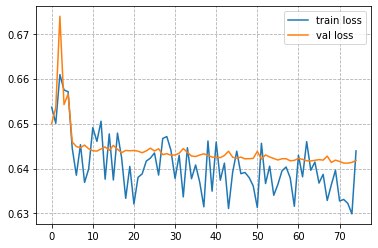

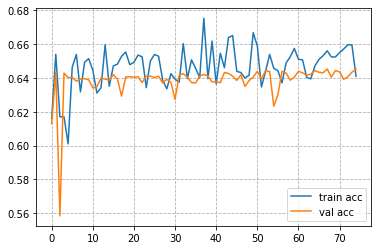

In [ ]:
import matplotlib.pyplot as plt
!pip install pyyaml h5py
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.inception_v3 import InceptionV3
#from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
#read_r16 = np.load('/content/drive/MyDrive/2022dataset 05 2 22/histore1.npy',allow_pickle='TRUE').item()
#read_r17 = np.load('/content/drive/MyDrive/2022dataset 05 2 22/historyv3.npy',allow_pickle='TRUE').item()
read_r17 = np.load('/content/drive/MyDrive/2022dataset 05 2 22/histore2.npy',allow_pickle='TRUE').item()
#read_r18 = np.load('/content/drive/MyDrive/2022dataset 05 2 22/histore3.npy',allow_pickle='TRUE').item()
#read_r19 = np.load('/content/drive/MyDrive/2022dataset 05 2 22/histore4.npy',allow_pickle='TRUE').item()
#read_r20 = np.load('/content/drive/MyDrive/2022dataset 05 2 22/histore5.npy',allow_pickle='TRUE').item()
#read_r21 = np.load('/content/drive/MyDrive/2022dataset 05 2 22/histore6.npy',allow_pickle='TRUE').item()
read_r22 = np.load('/content/drive/MyDrive/2022dataset 05 2 22/histore7.npy',allow_pickle='TRUE').item()
read_r23 = np.load('/content/drive/MyDrive/2022dataset 05 2 22/histore8.npy',allow_pickle='TRUE').item()
read_r24 = np.load('/content/drive/MyDrive/2022dataset 05 2 22/histore9.npy',allow_pickle='TRUE').item()
read_r25 = np.load('/content/drive/MyDrive/2022dataset 05 2 22/histore10.npy',allow_pickle='TRUE').item()
read_r26 = np.load('/content/drive/MyDrive/2022dataset 05 2 22/histore11.npy',allow_pickle='TRUE').item()
read_r27 = np.load('/content/drive/MyDrive/2022dataset 05 2 22/histore12.npy',allow_pickle='TRUE').item()
#r_total_loss = read_r16.history['loss']+read_r17.history['loss'] + read_r18.history['loss']+  read_r19.history['loss']+read_r20.history['loss']
#r_total_val_loss = read_r16.history['val_loss']+read_r17.history['val_loss'] + read_r18.history['val_loss']+ read_r19.history['val_loss']+read_r20.history['val_loss']
#r_total_accuracy = read_r16.history['acc']+read_r17.history['acc'] + read_r18.history['acc']+ read_r19.history['acc']+read_r20.history['acc']
#r_total_val_accuracy =read_r16.history['val_acc']+ read_r17.history['val_acc'] + read_r18.history['val_acc']+ read_r19.history['val_acc']+read_r20.history['acc']

#r_total_loss = read_r17.history['loss']+ read_r18.history['loss']+ read_r19.history['loss']+ read_r20.history['loss']+ read_r21.history['loss']+ read_r22.history['loss']+ read_r23.history['loss']+ read_r24.history['loss']+ read_r25.history['loss']+ read_r26.history['loss']
#r_total_val_loss = cread_r18.history['val_loss']+ read_r19.history['val_loss']+ read_r20.history['val_loss']+ read_r21.history['val_loss']+ read_r22.history['val_loss']+ read_r23.history['val_loss']+ read_r24.history['val_loss']+ read_r25.history['val_loss']+ read_r26.history['val_loss']
#r_total_accuracy =read_r17.history['acc']+ read_r18.history['acc']+ read_r19.history['acc']+ read_r20.history['acc']+ read_r21.history['acc']+ read_r22.history['acc']+ read_r23.history['acc']+ read_r24.history['acc']+ read_r25.history['acc']+ read_r26.history['acc']
#r_total_val_accuracy = read_r17.history['val_acc']+ read_r18.history['val_acc']+ read_r19.history['val_acc']+ read_r20.history['val_acc']+ read_r21.history['val_acc']+ read_r22.history['val_acc']+ read_r23.history['val_acc']+ read_r24.history['val_acc']+ read_r25.history['val_acc']+ read_r26.history['val_acc']

r_total_loss = read_r17.history['loss']+read_r22.history['loss']+read_r23.history['loss']+  read_r24.history['loss']+ read_r25.history['loss']+ read_r26.history['loss']+ read_r27.history['loss']
r_total_val_loss =  read_r17.history['val_loss']+read_r22.history['val_loss']+ read_r23.history['val_loss']+    read_r24.history['val_loss']+ read_r25.history['val_loss']+ read_r26.history['val_loss']+ read_r27.history['val_loss']
r_total_accuracy = read_r17.history['acc']+read_r22.history['acc']+ read_r23.history['acc']+ read_r24.history['acc']+ read_r25.history['acc']+ read_r26.history['acc']+ read_r27.history['acc']
r_total_val_accuracy = read_r17.history['val_acc']+read_r22.history['val_acc']+  read_r23.history['val_acc']+   read_r24.history['val_acc']+ read_r25.history['val_acc']+ read_r26.history['val_acc']+ read_r27.history['val_acc']



#print(read_r1.history['loss'])
from matplotlib import pyplot
pyplot.grid(linestyle='--')


# plot the loss
plt.plot(r_total_loss,  label='train loss')
plt.plot(r_total_val_loss, label='val loss')
plt.legend()
plt.savefig('LossVal_lossres100epochs.pdf',format='pdf',dpi=800)
plt.show()

# plot the accuracy
plt.plot(r_total_accuracy, label='train acc')
plt.plot(r_total_val_accuracy , label='val acc')
plt.legend()
pyplot.grid(linestyle='--')

plt.savefig('AccVal_accresne500100epochs.pdf',format='pdf', dpi=800)

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras import optimizers
from PIL import Image
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
!pip install pyyaml h5py
import os
base_dir = '/content/drive/MyDrive/2022dataset 05 2 22'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=40,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=40,
    class_mode='binary')
modelr4 =load_model('/content/drive/MyDrive/2022dataset 05 2 22/res4.h5')

read_re4 = np.load('/content/drive/MyDrive/2022dataset 05 2 22/histore4.npy',allow_pickle='TRUE').item()


# Compile the model
modelr4.compile(loss='binary_crossentropy',
optimizer=optimizers.SGD(lr=2e-5),
metrics=['acc'])

# Train the model
histore5 = modelr4.fit_generator(
    train_generator,
    steps_per_epoch=50,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=len(validation_generator))

# Save the model
modelr4.save('/content/drive/MyDrive/2022dataset 05 2 22/res5.h5')
np.save('/content/drive/MyDrive/2022dataset 05 2 22/histore5', histore5)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Found 34128 images belonging to 2 classes.
Found 8726 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/20
50/50 [==============================] - 3587s 73s/step - loss: 0.6548 - acc: 0.6180 - val_loss: 0.6568 - val_acc: 0.6319
Epoch 2/20
50/50 [==============================] - 1062s 21s/step - loss: 0.6533 - acc: 0.6290 - val_loss: 0.6525 - val_acc: 0.6454
Epoch 3/20
50/50 [==============================] - 1099s 22s/step - loss: 0.6541 - acc: 0.6260 - val_loss: 0.6541 - val_acc: 0.6421
Epoch 4/20
50/50 [==============================] - 1045s 21s/step - loss: 0.6591 - acc: 0.6175 - val_loss: 0.6534 - val_acc: 0.6423
Epoch 5/20
50/50 [==============================] - 1051s 21s/step - loss: 0.6517 - acc: 0.6285 - val_loss: 0.6636 - val_acc: 0.6005
Epoch 6/20
50/50 [==============================] - 1075s 22s/step - loss: 0.6519 - acc: 0.6145 - val_loss: 0.6737 - val_acc: 0.5581
Epoch 7/20
50/50 [==============================] - 991s 20s/step - loss: 0.6571 - acc: 0.6325 - val_loss: 0.6572 - val_acc: 0.6270
Epoch 8/20
50/50 [==============================] - 970s 20s/step - lo

In [ ]:
import numpy as np
from tensorflow.keras import optimizers
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
!pip install pyyaml h5py
import matplotlib.pyplot as plt
!pip install pyyaml h5py
from google.colab import drive
drive.mount('/content/drive')
import os
base_dir = '/content/drive/MyDrive/2022dataset 05 2 22'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
train_datagen = ImageDataGenerator(
    rescale=1./255)
   # rotation_range=40,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    #shear_range=0.2,
    #zoom_range=0.2,
    #horizontal_flip=True,
    #fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=40,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=40,
    class_mode='binary')
modelr6 =load_model('/content/drive/MyDrive/2022dataset 05 2 22/res6.h5')

read_re6 = np.load('/content/drive/MyDrive/2022dataset 05 2 22/histore6.npy',allow_pickle='TRUE').item()


# Compile the model
modelr6.compile(loss='binary_crossentropy',
optimizer=optimizers.SGD(lr=0.2e-5),
metrics=['acc'])

# Train the model
histore7 = modelr6.fit_generator(
    train_generator,
    steps_per_epoch=70,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=len(validation_generator))

# Save the model
modelr6.save('/content/drive/MyDrive/2022dataset 05 2 22/res7.h5')
np.save('/content/drive/MyDrive/2022dataset 05 2 22/histore7', histore7)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 34128 images belonging to 2 classes.
Found 8726 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:62: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/5
70/70 [==============================] - 3369s 49s/step - loss: 0.6445 - acc: 0.6464 - val_loss: 0.6459 - val_acc: 0.6403
Epoch 2/5
70/70 [==============================] - 987s 14s/step - loss: 0.6385 - acc: 0.6539 - val_loss: 0.6449 - val_acc: 0.6381
Epoch 3/5
70/70 [==============================] - 982s 14s/step - loss: 0.6453 - acc: 0.6318 - val_loss: 0.6446 - val_acc: 0.6394
Epoch 4/5
70/70 [==============================] - 948s 14s/step - loss: 0.6369 - acc: 0.6493 - val_loss: 0.6452 - val_acc: 0.6396
Epoch 5/5
70/70 [==============================] - 957s 14s/step - loss: 0.6399 - acc: 0.6514 - val_loss: 0.6444 - val_acc: 0.6389
INFO:tensorflow:Assets written to: ram://1c1ed4dc-50f5-4e6f-9c48-cb6cd9ffb4e8/assets


In [ ]:
import numpy as np
from tensorflow.keras import optimizers
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
!pip install pyyaml h5py
import matplotlib.pyplot as plt
!pip install pyyaml h5py
from google.colab import drive
drive.mount('/content/drive')
import os
base_dir = '/content/drive/MyDrive/2022dataset 05 2 22'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
train_datagen = ImageDataGenerator(
    rescale=1./255)
   # rotation_range=40,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    #shear_range=0.2,
    #zoom_range=0.2,
    #horizontal_flip=True,
    #fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=40,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=40,
    class_mode='binary')
modelr7 =load_model('/content/drive/MyDrive/2022dataset 05 2 22/res7.h5')

read_re7 = np.load('/content/drive/MyDrive/2022dataset 05 2 22/histore7.npy',allow_pickle='TRUE').item()


# Compile the model
modelr7.compile(loss='binary_crossentropy',
optimizer=optimizers.SGD(lr=0.2e-5),
metrics=['acc'])

# Train the model
histore8 = modelr7.fit_generator(
    train_generator,
    steps_per_epoch=70,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator))

# Save the model
modelr7.save('/content/drive/MyDrive/2022dataset 05 2 22/res8.h5')
np.save('/content/drive/MyDrive/2022dataset 05 2 22/histore8', histore8)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 34128 images belonging to 2 classes.
Found 8726 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:62: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/10
70/70 [==============================] - 4084s 59s/step - loss: 0.6491 - acc: 0.6446 - val_loss: 0.6440 - val_acc: 0.6342
Epoch 2/10
70/70 [==============================] - 1426s 20s/step - loss: 0.6460 - acc: 0.6311 - val_loss: 0.6439 - val_acc: 0.6347
Epoch 3/10
70/70 [==============================] - 1289s 18s/step - loss: 0.6505 - acc: 0.6343 - val_loss: 0.6444 - val_acc: 0.6400
Epoch 4/10
70/70 [==============================] - 1228s 18s/step - loss: 0.6376 - acc: 0.6596 - val_loss: 0.6448 - val_acc: 0.6394
Epoch 5/10
70/70 [==============================] - 1145s 16s/step - loss: 0.6477 - acc: 0.6351 - val_loss: 0.6440 - val_acc: 0.6387
Epoch 6/10
70/70 [==============================] - 1118s 16s/step - loss: 0.6374 - acc: 0.6471 - val_loss: 0.6451 - val_acc: 0.6420
Epoch 7/10
70/70 [==============================] - 1020s 15s/step - loss: 0.6479 - acc: 0.6482 - val_loss: 0.6443 - val_acc: 0.6394
Epoch 8/10
70/70 [==============================] - 956s 14s/step - l

In [ ]:
import numpy as np
from tensorflow.keras import optimizers
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
!pip install pyyaml h5py
import matplotlib.pyplot as plt
!pip install pyyaml h5py
from google.colab import drive
drive.mount('/content/drive')
import os
base_dir = '/content/drive/MyDrive/2022dataset 05 2 22'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
train_datagen = ImageDataGenerator(
    rescale=1./255)
   # rotation_range=40,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    #shear_range=0.2,
    #zoom_range=0.2,
    #horizontal_flip=True,
    #fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=40,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=40,
    class_mode='binary')
modelr8 =load_model('/content/drive/MyDrive/2022dataset 05 2 22/res8.h5')

read_re8 = np.load('/content/drive/MyDrive/2022dataset 05 2 22/histore8.npy',allow_pickle='TRUE').item()


# Compile the model
modelr8.compile(loss='binary_crossentropy',
optimizer=optimizers.SGD(lr=0.2e-5),
metrics=['acc'])

# Train the model
histore9 = modelr8.fit_generator(
    train_generator,
    steps_per_epoch=70,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=len(validation_generator))

# Save the model
modelr8.save('/content/drive/MyDrive/2022dataset 05 2 22/res9.h5')
np.save('/content/drive/MyDrive/2022dataset 05 2 22/histore9', histore9)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 34128 images belonging to 2 classes.
Found 8726 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:62: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/15
70/70 [==============================] - 870s 13s/step - loss: 0.6321 - acc: 0.6493 - val_loss: 0.6440 - val_acc: 0.6405
Epoch 2/15
70/70 [==============================] - 676s 10s/step - loss: 0.6380 - acc: 0.6536 - val_loss: 0.6438 - val_acc: 0.6407
Epoch 3/15
70/70 [==============================] - 672s 10s/step - loss: 0.6388 - acc: 0.6525 - val_loss: 0.6435 - val_acc: 0.6373
Epoch 4/15
70/70 [==============================] - 649s 9s/step - loss: 0.6416 - acc: 0.6343 - val_loss: 0.6439 - val_acc: 0.6412
Epoch 5/15
70/70 [==============================] - 650s 9s/step - loss: 0.6423 - acc: 0.6500 - val_loss: 0.6445 - val_acc: 0.6411
Epoch 6/15
70/70 [==============================] - 650s 9s/step - loss: 0.6435 - acc: 0.6539 - val_loss: 0.6439 - val_acc: 0.6403
Epoch 7/15
70/70 [==============================] - 621s 9s/step - loss: 0.6385 - acc: 0.6529 - val_loss: 0.6444 - val_acc: 0.6411
Epoch 8/15
70/70 [==============================] - 619s 9s/step - loss: 0.6467 

In [ ]:
import numpy as np
from tensorflow.keras import optimizers
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
!pip install pyyaml h5py
import matplotlib.pyplot as plt
!pip install pyyaml h5py
from google.colab import drive
drive.mount('/content/drive')
import os
base_dir = '/content/drive/MyDrive/2022dataset 05 2 22'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
train_datagen = ImageDataGenerator(
    rescale=1./255)
   # rotation_range=40,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    #shear_range=0.2,
    #zoom_range=0.2,
    #horizontal_flip=True,
    #fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=40,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=40,
    class_mode='binary')
modelr9 =load_model('/content/drive/MyDrive/2022dataset 05 2 22/res9.h5')

read_re9 = np.load('/content/drive/MyDrive/2022dataset 05 2 22/histore9.npy',allow_pickle='TRUE').item()


# Compile the model
modelr9.compile(loss='binary_crossentropy',
optimizer=optimizers.SGD(lr=0.2e-5),
metrics=['acc'])

# Train the model
histore10 = modelr9.fit_generator(
    train_generator,
    steps_per_epoch=70,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=len(validation_generator))

# Save the model
modelr9.save('/content/drive/MyDrive/2022dataset 05 2 22/res10.h5')
np.save('/content/drive/MyDrive/2022dataset 05 2 22/histore10', histore10)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 34128 images belonging to 2 classes.
Found 8726 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:62: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/15
70/70 [==============================] - 652s 9s/step - loss: 0.6408 - acc: 0.6457 - val_loss: 0.6427 - val_acc: 0.6371
Epoch 2/15
70/70 [==============================] - 622s 9s/step - loss: 0.6369 - acc: 0.6402 - val_loss: 0.6430 - val_acc: 0.6412
Epoch 3/15
70/70 [==============================] - 624s 9s/step - loss: 0.6315 - acc: 0.6754 - val_loss: 0.6433 - val_acc: 0.6421
Epoch 4/15
70/70 [==============================] - 646s 9s/step - loss: 0.6461 - acc: 0.6396 - val_loss: 0.6429 - val_acc: 0.6412
Epoch 5/15
70/70 [==============================] - 636s 9s/step - loss: 0.6350 - acc: 0.6618 - val_loss: 0.6425 - val_acc: 0.6376
Epoch 6/15
70/70 [==============================] - 596s 9s/step - loss: 0.6459 - acc: 0.6364 - val_loss: 0.6425 - val_acc: 0.6379
Epoch 7/15
70/70 [==============================] - 609s 9s/step - loss: 0.6374 - acc: 0.6546 - val_loss: 0.6424 - val_acc: 0.6372
Epoch 8/15
70/70 [==============================] - 606s 9s/step - loss: 0.6412 - a

In [ ]:
import numpy as np
from tensorflow.keras import optimizers
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
!pip install pyyaml h5py
import matplotlib.pyplot as plt
!pip install pyyaml h5py
from google.colab import drive
drive.mount('/content/drive')
import os
base_dir = '/content/drive/MyDrive/2022dataset 05 2 22'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
train_datagen = ImageDataGenerator(
    rescale=1./255)
   # rotation_range=40,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    #shear_range=0.2,
    #zoom_range=0.2,
    #horizontal_flip=True,
    #fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=40,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=40,
    class_mode='binary')
modelr10 =load_model('/content/drive/MyDrive/2022dataset 05 2 22/res10.h5')

read_re10 = np.load('/content/drive/MyDrive/2022dataset 05 2 22/histore10.npy',allow_pickle='TRUE').item()


# Compile the model
modelr10.compile(loss='binary_crossentropy',
optimizer=optimizers.SGD(lr=0.2e-5),
metrics=['acc'])

# Train the model
histore11 = modelr10.fit_generator(
    train_generator,
    steps_per_epoch=70,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=len(validation_generator))

# Save the model
modelr10.save('/content/drive/MyDrive/2022dataset 05 2 22/res11.h5')
np.save('/content/drive/MyDrive/2022dataset 05 2 22/histore11', histore11)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 34128 images belonging to 2 classes.
Found 8726 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:62: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/5
70/70 [==============================] - 3886s 56s/step - loss: 0.6313 - acc: 0.6589 - val_loss: 0.6438 - val_acc: 0.6439
Epoch 2/5
70/70 [==============================] - 1338s 19s/step - loss: 0.6456 - acc: 0.6346 - val_loss: 0.6421 - val_acc: 0.6395
Epoch 3/5
70/70 [==============================] - 1281s 18s/step - loss: 0.6367 - acc: 0.6439 - val_loss: 0.6430 - val_acc: 0.6443
Epoch 4/5
70/70 [==============================] - 1196s 17s/step - loss: 0.6405 - acc: 0.6539 - val_loss: 0.6426 - val_acc: 0.6438
Epoch 5/5
70/70 [==============================] - 1122s 16s/step - loss: 0.6340 - acc: 0.6457 - val_loss: 0.6422 - val_acc: 0.6233
INFO:tensorflow:Assets written to: ram://d0cd8491-17d9-4ad0-8a0b-2b7646b5e7b6/assets


In [ ]:
import numpy as np
from tensorflow.keras import optimizers
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
!pip install pyyaml h5py
import matplotlib.pyplot as plt
!pip install pyyaml h5py
from google.colab import drive
drive.mount('/content/drive')
import os
base_dir = '/content/drive/MyDrive/2022dataset 05 2 22'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
train_datagen = ImageDataGenerator(
    rescale=1./255)
   # rotation_range=40,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    #shear_range=0.2,
    #zoom_range=0.2,
    #horizontal_flip=True,
    #fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=40,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=40,
    class_mode='binary')
modelr11 =load_model('/content/drive/MyDrive/2022dataset 05 2 22/res11.h5')

read_re11 = np.load('/content/drive/MyDrive/2022dataset 05 2 22/histore11.npy',allow_pickle='TRUE').item()


# Compile the model
modelr11.compile(loss='binary_crossentropy',
optimizer=optimizers.SGD(lr=0.2e-5),
metrics=['acc'])

# Train the model
histore12 = modelr11.fit_generator(
    train_generator,
    steps_per_epoch=70,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=len(validation_generator))

# Save the model
modelr11.save('/content/drive/MyDrive/2022dataset 05 2 22/res12.h5')
np.save('/content/drive/MyDrive/2022dataset 05 2 22/histore12.npy', histore12)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 34128 images belonging to 2 classes.
Found 8726 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:62: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/20
70/70 [==============================] - 3813s 55s/step - loss: 0.6365 - acc: 0.6443 - val_loss: 0.6419 - val_acc: 0.6301
Epoch 2/20
70/70 [==============================] - 883s 13s/step - loss: 0.6395 - acc: 0.6371 - val_loss: 0.6422 - val_acc: 0.6439
Epoch 3/20
70/70 [==============================] - 849s 12s/step - loss: 0.6403 - acc: 0.6489 - val_loss: 0.6422 - val_acc: 0.6429
Epoch 4/20
70/70 [==============================] - 835s 12s/step - loss: 0.6379 - acc: 0.6525 - val_loss: 0.6417 - val_acc: 0.6387
Epoch 5/20
70/70 [==============================] - 814s 12s/step - loss: 0.6316 - acc: 0.6575 - val_loss: 0.6418 - val_acc: 0.6405
Epoch 6/20
70/70 [==============================] - 780s 11s/step - loss: 0.6429 - acc: 0.6511 - val_loss: 0.6422 - val_acc: 0.6439
Epoch 7/20
70/70 [==============================] - 771s 11s/step - loss: 0.6382 - acc: 0.6507 - val_loss: 0.6420 - val_acc: 0.6430
Epoch 8/20
70/70 [==============================] - 818s 12s/step - loss: 0

In [ ]:
import numpy as np
from tensorflow.keras import optimizers
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
!pip install pyyaml h5py
import matplotlib.pyplot as plt
!pip install pyyaml h5py
from google.colab import drive
drive.mount('/content/drive')
import os
base_dir = '/content/drive/MyDrive/2022dataset 05 2 22'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
train_datagen = ImageDataGenerator(
    rescale=1./255)
   # rotation_range=40,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    #shear_range=0.2,
    #zoom_range=0.2,
    #horizontal_flip=True,
    #fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=40,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=40,
    class_mode='binary')
modelr12 =load_model('/content/drive/MyDrive/2022dataset 05 2 22/res12.h5')

read_re12 = np.load('/content/drive/MyDrive/2022dataset 05 2 22/histore12.npy',allow_pickle='TRUE').item()


# Compile the model
modelr12.compile(loss='binary_crossentropy',
optimizer=optimizers.SGD(lr=0.2e-5),
metrics=['acc'])

# Train the model
histore13 = modelr12.fit_generator(
    train_generator,
    steps_per_epoch=70,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=len(validation_generator))

# Save the model
modelr12.save('/content/drive/MyDrive/2022dataset 05 2 22/res13.h5')
np.save('/content/drive/MyDrive/2022dataset 05 2 22/histore13.npy', histore13)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 34128 images belonging to 2 classes.
Found 8726 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:62: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/20
70/70 [==============================] - 3080s 45s/step - loss: 0.6352 - acc: 0.6597 - val_loss: 0.6416 - val_acc: 0.6441
Epoch 2/20
70/70 [==============================] - 874s 13s/step - loss: 0.6350 - acc: 0.6621 - val_loss: 0.6412 - val_acc: 0.6437
Epoch 3/20
70/70 [==============================] - 886s 13s/step - loss: 0.6314 - acc: 0.6604 - val_loss: 0.6412 - val_acc: 0.6438
Epoch 4/20
70/70 [==============================] - 864s 12s/step - loss: 0.6413 - acc: 0.6471 - val_loss: 0.6418 - val_acc: 0.6467
Epoch 5/20
70/70 [==============================] - 801s 12s/step - loss: 0.6343 - acc: 0.6593 - val_loss: 0.6413 - val_acc: 0.6437
Epoch 6/20
70/70 [==============================] - 789s 11s/step - loss: 0.6426 - acc: 0.6382 - val_loss: 0.6412 - val_acc: 0.6441
Epoch 7/20
70/70 [==============================] - 791s 11s/step - loss: 0.6307 - acc: 0.6700 - val_loss: 0.6418 - val_acc: 0.6457
Epoch 8/20
70/70 [==============================] - 795s 11s/step - loss: 0

In [ ]:
import numpy as np
from tensorflow.keras import optimizers
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
!pip install pyyaml h5py
import matplotlib.pyplot as plt
!pip install pyyaml h5py
from google.colab import drive
drive.mount('/content/drive')
import os
base_dir = '/content/drive/MyDrive/2022dataset 05 2 22'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
train_datagen = ImageDataGenerator(
    rescale=1./255)
   # rotation_range=40,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    #shear_range=0.2,
    #zoom_range=0.2,
    #horizontal_flip=True,
    #fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=40,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=40,
    class_mode='binary')
modelr13 =load_model('/content/drive/MyDrive/2022dataset 05 2 22/res13.h5')

read_re13 = np.load('/content/drive/MyDrive/2022dataset 05 2 22/histore13.npy',allow_pickle='TRUE').item()


# Compile the model
modelr13.compile(loss='binary_crossentropy',
optimizer=optimizers.SGD(lr=0.2e-5),
metrics=['acc'])

# Train the model
histore14 = modelr13.fit_generator(
    train_generator,
    steps_per_epoch=70,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator))

# Save the model
modelr13.save('/content/drive/MyDrive/2022dataset 05 2 22/res14.h5')
np.save('/content/drive/MyDrive/2022dataset 05 2 22/histore14.npy', histore14)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 34128 images belonging to 2 classes.
Found 8726 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:62: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/10
70/70 [==============================] - 649s 9s/step - loss: 0.6370 - acc: 0.6543 - val_loss: 0.6404 - val_acc: 0.6319
Epoch 2/10
70/70 [==============================] - 627s 9s/step - loss: 0.6248 - acc: 0.6657 - val_loss: 0.6402 - val_acc: 0.6410
Epoch 3/10
70/70 [==============================] - 656s 9s/step - loss: 0.6355 - acc: 0.6429 - val_loss: 0.6403 - val_acc: 0.6444
Epoch 4/10
70/70 [==============================] - 669s 10s/step - loss: 0.6369 - acc: 0.6443 - val_loss: 0.6401 - val_acc: 0.6380
Epoch 5/10
70/70 [==============================] - 666s 10s/step - loss: 0.6309 - acc: 0.6589 - val_loss: 0.6419 - val_acc: 0.6499
Epoch 6/10
70/70 [==============================] - 639s 9s/step - loss: 0.6279 - acc: 0.6745 - val_loss: 0.6410 - val_acc: 0.6478
Epoch 7/10
70/70 [==============================] - 639s 9s/step - loss: 0.6358 - acc: 0.6557 - val_loss: 0.6403 - val_acc: 0.6451
Epoch 8/10
70/70 [==============================] - 647s 9s/step - loss: 0.6412 -